# Weekly assignment 1: exploratory data analysis

## Introduction

The goal of this assignment is to explore the data, learn how to clean it and observe data distributions. I will be working with a data extracted from activity trackers. There was a study conducted in France, where 900 participants volunteered. They wore a Fitbit Zip (a clip-on activity tracker) and recorded their daily steps, distance and calories. The data was simulated from the actual data to conform to the GDPR law. I will clean and analyse this data.

## Data cleaning

### Reading and merging datasets

Beginning with importing neccessary libraries which later will be used in the code to achieve certain intents.

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Firstly I will import two already existing datasets which I have in CSV format. 

In [4]:
steps = pd.read_csv("steps.csv", sep=";")
survey = pd.read_csv("survey.csv")

Using .head() command I'm checking if the CSV files are imported to the Jupyter notebook correctly

In [5]:
steps.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
survey.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


I'm merging two datasets into one so it's easier to work with them. Both datasets have one column which has the same value: "id". I will use this column name to merge two datasets.

In [7]:
df = survey.merge(steps, on="id")

### Cleaning the data

Cleaning the data. Some values are impossible, therefore it's important to remove them from a dataset to avoid misleading insights. For that I will sort the column "weight" values to indicate the extreme values.

In [8]:
df.sort_values(by="weight", ascending=False)

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
43,44,Lille,Female,35-44,4,4,Master or doctorate,156.0,700.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
820,821,Lille,Female,25-34,3,4,Master or doctorate,160.0,155.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
549,550,Lille,Male,45-54,1,1,Bachelor,193.0,155.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,258,Lille,Male,25-34,4,4,Bachelor,183.0,149.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,26,Lille,Male,35-44,4,4,High school,185.0,140.0,164.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,103,Bordeaux,Female,25-34,2,2,Bachelor,157.0,37.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840,841,Lille,Female,35-44,3,4,High school,158.0,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,390,Lille,Female,25-34,3,4,Vocational,156.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
841,842,Lille,Female,35-44,3,4,Master or doctorate,160.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.sort_values(by="weight", ascending=True)

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
389,390,Lille,Female,25-34,3,4,Vocational,156.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840,841,Lille,Female,35-44,3,4,High school,158.0,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,103,Bordeaux,Female,25-34,2,2,Bachelor,157.0,37.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
633,634,Lille,Female,25-34,2,5,Bachelor,156.0,45.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,118,Lille,Female,45-54,5,4,Bachelor,157.0,45.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,550,Lille,Male,45-54,1,1,Bachelor,193.0,155.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
820,821,Lille,Female,25-34,3,4,Master or doctorate,160.0,155.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,44,Lille,Female,35-44,4,4,Master or doctorate,156.0,700.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
841,842,Lille,Female,35-44,3,4,Master or doctorate,160.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Weight values 700, 20 and 6 are impossible therefore I will remove them.

In [10]:
df = df[(df["weight"] < 200) & (df["weight"] > 30)]

Removing rows which have many NaN values. Decided to drop rows and columns which miss more than 20 percent of their values. My decision about the threshold of missing values being 20 is based on Google search. Some sources suggested dropping values when 10, some- when 30 percent of data is missing. That's why I took the average number from suggestions and will use 20 as missing values percentage threshold. First I will see how many rows and columns my dataset has currently.

In [11]:
len(df.index) #row count

924

In [12]:
df.shape[1] #column count

337

Removing rows and columns that have more than 20 percent of missing data. Firstly calculating how much 20 percent is for each number (number of rows and number of columns)

In [13]:
# 337-9 is 328, that's why 328 is used in this calculation. 
# We don't want to take into account columns as city, education, gender, age...Since they don't have many
# missing NaN values.
328/100*20 # if a row will have more than 66 NaN values, it will be removed from a dataset

65.6

In [14]:
924/100*20
# if a column will have more than 185 NaN values, it will be removed from a dataset

184.8

In [15]:
df2= df.dropna(axis=0, thresh=66, inplace=False)
len(df2.index)
# in a dataset 566 rows are valid for further analysis

566

In [16]:
df3 = df2.dropna(axis=1, thresh=185, inplace=False)
df3.shape[1]
# in a dataset 217 columns are valid for further analysis

217

In [17]:
df3.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,21-6-2013,...,5-1-2014,6-1-2014,7-1-2014,8-1-2014,9-1-2014,10-1-2014,11-1-2014,13-1-2014,14-1-2014,15-1-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,15015.0,5926.0,14658.0,7314.0,4949.0,9945.0,9209.0,11579.0,16001.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,11428.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Lille,Male,35-44,1,1,Vocational,170.0,63.0,16924.0,...,3934.0,6199.0,6227.0,3821.0,6891.0,7407.0,9474.0,11674.0,8509.0,6244.0
7,8,Bordeaux,Female,25-34,3,4,Master or doctorate,165.0,88.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataset still has many NaN values, I will convert those to 0.

In [18]:
dfNew= df3.replace(np.nan, 0)
dfNew.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,21-6-2013,...,5-1-2014,6-1-2014,7-1-2014,8-1-2014,9-1-2014,10-1-2014,11-1-2014,13-1-2014,14-1-2014,15-1-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,15015.0,5926.0,14658.0,7314.0,4949.0,9945.0,9209.0,11579.0,16001.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,11428.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,Lille,Male,35-44,1,1,Vocational,170.0,63.0,16924.0,...,3934.0,6199.0,6227.0,3821.0,6891.0,7407.0,9474.0,11674.0,8509.0,6244.0
7,8,Bordeaux,Female,25-34,3,4,Master or doctorate,165.0,88.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating variable mean steps per participant


In order to calculate mean of steps per participant and add it to a dataframe, firstly I need to split a dataset into a new one which contains only number of steps data (and excludes city, gender and other unrelated data).

In [19]:
df_meanData = dfNew.iloc[:, 9:220]
df_meanData.head()

,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,29-6-2013,30-6-2013,...,5-1-2014,6-1-2014,7-1-2014,8-1-2014,9-1-2014,10-1-2014,11-1-2014,13-1-2014,14-1-2014,15-1-2014
0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,15773.0,2795.0,...,0.0,15015.0,5926.0,14658.0,7314.0,4949.0,9945.0,9209.0,11579.0,16001.0
1,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,2952.0,4839.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,5700.0,3998.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,16924.0,14411.0,5121.0,29784.0,8995.0,23336.0,15.0,17075.0,0.0,18190.0,...,3934.0,6199.0,6227.0,3821.0,6891.0,7407.0,9474.0,11674.0,8509.0,6244.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# I put data, which is unrelated to the average steps number to a separate dataframe
# so when I calculate mean of steps I can merge dataframes together into one dataset.
df_otherData = dfNew.iloc[:, 0:9]
df_otherData.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
5,6,Lille,Male,35-44,1,1,Vocational,170.0,63.0
7,8,Bordeaux,Female,25-34,3,4,Master or doctorate,165.0,88.0


In [21]:
# Replacing zeros which indicate missing values with NaN, so when calculating mean a zero wouldn't be 
# considered as value and we would get more correct results
df4 = df_meanData.replace(0, np.NaN)
df4.head()

,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,29-6-2013,30-6-2013,...,5-1-2014,6-1-2014,7-1-2014,8-1-2014,9-1-2014,10-1-2014,11-1-2014,13-1-2014,14-1-2014,15-1-2014
0,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,15773.0,2795.0,...,NaN,15015.0,5926.0,14658.0,7314.0,4949.0,9945.0,9209.0,11579.0,16001.0
1,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,2952.0,4839.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,5700.0,3998.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,16924.0,14411.0,5121.0,29784.0,8995.0,23336.0,15.0,17075.0,NaN,18190.0,...,3934.0,6199.0,6227.0,3821.0,6891.0,7407.0,9474.0,11674.0,8509.0,6244.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df4['mean'] = df4.mean(axis=1)
df4.head()

,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,29-6-2013,30-6-2013,...,6-1-2014,7-1-2014,8-1-2014,9-1-2014,10-1-2014,11-1-2014,13-1-2014,14-1-2014,15-1-2014,mean
0,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,15773.0,2795.0,...,15015.0,5926.0,14658.0,7314.0,4949.0,9945.0,9209.0,11579.0,16001.0,10148.607362
1,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,2952.0,4839.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,5700.0,3998.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8598.884892
5,16924.0,14411.0,5121.0,29784.0,8995.0,23336.0,15.0,17075.0,NaN,18190.0,...,6199.0,6227.0,3821.0,6891.0,7407.0,9474.0,11674.0,8509.0,6244.0,12064.380282
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3614.421053


In [23]:
# replacing NaN values back to zeros for further analysis
dfMean= df4.replace(np.nan, 0)
dfMean.head()

,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,29-6-2013,30-6-2013,...,6-1-2014,7-1-2014,8-1-2014,9-1-2014,10-1-2014,11-1-2014,13-1-2014,14-1-2014,15-1-2014,mean
0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,15773.0,2795.0,...,15015.0,5926.0,14658.0,7314.0,4949.0,9945.0,9209.0,11579.0,16001.0,10148.607362
1,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,2952.0,4839.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5687.423313
2,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,5700.0,3998.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8598.884892
5,16924.0,14411.0,5121.0,29784.0,8995.0,23336.0,15.0,17075.0,0.0,18190.0,...,6199.0,6227.0,3821.0,6891.0,7407.0,9474.0,11674.0,8509.0,6244.0,12064.380282
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3614.421053


Joining two dataframes into one

In [24]:
dfFinal = pd.merge(df_otherData, dfMean, left_index=True, right_index=True)

### Showing the head() of resulting dataframe


In [25]:
dfFinal.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,21-6-2013,...,6-1-2014,7-1-2014,8-1-2014,9-1-2014,10-1-2014,11-1-2014,13-1-2014,14-1-2014,15-1-2014,mean
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,15015.0,5926.0,14658.0,7314.0,4949.0,9945.0,9209.0,11579.0,16001.0,10148.607362
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,11428.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8598.884892
5,6,Lille,Male,35-44,1,1,Vocational,170.0,63.0,16924.0,...,6199.0,6227.0,3821.0,6891.0,7407.0,9474.0,11674.0,8509.0,6244.0,12064.380282
7,8,Bordeaux,Female,25-34,3,4,Master or doctorate,165.0,88.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3614.421053


## Exploratory data analysis


I will analyse mean steps per participant and show a relation of mean steps per participant with two categorical variables

### Analysis mean steps per participant


#### Graphs of the distribution 


Histogram

/Users/godajusaite/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


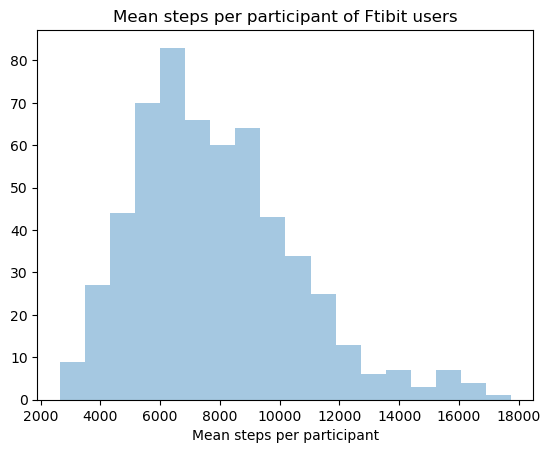

In [26]:
dfFinal['mean'].name = 'Mean steps per participant' 
mean_steps = dfFinal['mean'] 
sns.distplot(mean_steps, kde=False) 
plt.title('Mean steps per participant of Ftibit users')
plt.show()

Box plot

/Users/godajusaite/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


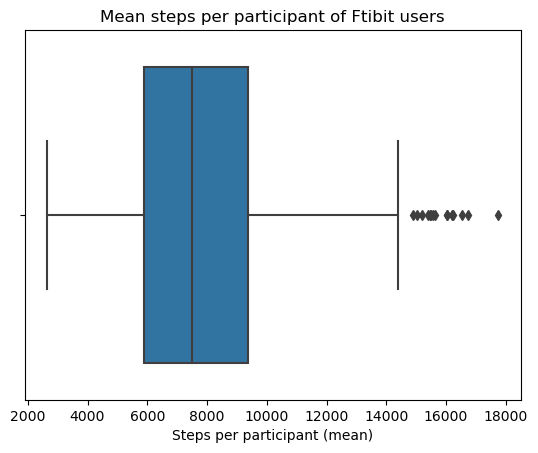

In [27]:
sns.boxplot(dfFinal['mean'])
plt.title('Mean steps per participant of Ftibit users')
plt.xlabel('Steps per participant (mean)')
plt.show()

Density plot

/Users/godajusaite/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/godajusaite/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


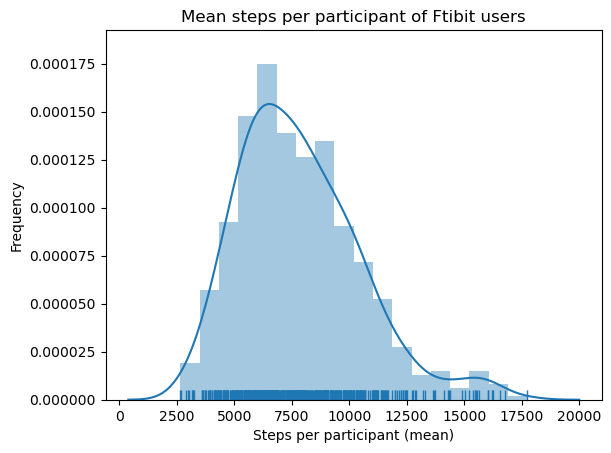

In [28]:
sns.distplot(mean_steps, rug=True)
plt.title('Mean steps per participant of Ftibit users')
plt.xlabel('Steps per participant (mean)')
plt.ylabel('Frequency')
plt.show()

Violin plot

/Users/godajusaite/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


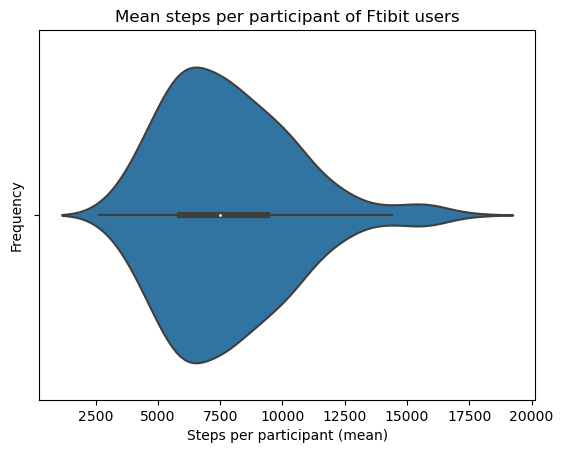

In [29]:
sns.violinplot(dfFinal['mean'])
plt.title('Mean steps per participant of Ftibit users')
plt.ylabel('Frequency')
plt.xlabel('Steps per participant (mean)')
plt.show()

#### Summary statistics
Measuring central tendency and variation

Measuring mean number of steps per participant

In [30]:
mean_number = dfFinal['mean'].mean()
print(f'Mean of steps per participant is: {mean_number} steps')

Mean of steps per participant is: 7836.6751548187 steps


Measuring median number of steps per participant. For this I will use dataframe created before, which contains only values related to amount of steps (df4). To calculate median, I need to remove a column 'mean' from dataframe, otherwise median value will include mean number when calculating, and will be incorrect.

In [31]:
dfMedian = df4.drop('mean', inplace=False, axis=1)
dfMedian.head()

,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,29-6-2013,30-6-2013,...,5-1-2014,6-1-2014,7-1-2014,8-1-2014,9-1-2014,10-1-2014,11-1-2014,13-1-2014,14-1-2014,15-1-2014
0,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,15773.0,2795.0,...,NaN,15015.0,5926.0,14658.0,7314.0,4949.0,9945.0,9209.0,11579.0,16001.0
1,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,2952.0,4839.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,5700.0,3998.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,16924.0,14411.0,5121.0,29784.0,8995.0,23336.0,15.0,17075.0,NaN,18190.0,...,3934.0,6199.0,6227.0,3821.0,6891.0,7407.0,9474.0,11674.0,8509.0,6244.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Adding a new column to dataframe which will show median values for each row.

In [32]:
dfMedian['median']=dfMedian.median(axis=1)
dfMedian.head()

,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,29-6-2013,30-6-2013,...,6-1-2014,7-1-2014,8-1-2014,9-1-2014,10-1-2014,11-1-2014,13-1-2014,14-1-2014,15-1-2014,median
0,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,15773.0,2795.0,...,15015.0,5926.0,14658.0,7314.0,4949.0,9945.0,9209.0,11579.0,16001.0,9739.0
1,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,2952.0,4839.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5374.0
2,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,5700.0,3998.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8826.0
5,16924.0,14411.0,5121.0,29784.0,8995.0,23336.0,15.0,17075.0,NaN,18190.0,...,6199.0,6227.0,3821.0,6891.0,7407.0,9474.0,11674.0,8509.0,6244.0,11815.5
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3063.0


In [33]:
median_number = dfMedian['median'].median()
print(f'Median of steps per participant is: {median_number} steps')

Median of steps per participant is: 7139.25 steps


Calculating standart deviation of steps per participant. Removing a column with median values so it wouldn't be included to a calculation of standart deviation.

In [34]:
dfStand = dfMedian.drop('median', inplace=False, axis=1)
dfStand.head()

,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,29-6-2013,30-6-2013,...,5-1-2014,6-1-2014,7-1-2014,8-1-2014,9-1-2014,10-1-2014,11-1-2014,13-1-2014,14-1-2014,15-1-2014
0,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,15773.0,2795.0,...,NaN,15015.0,5926.0,14658.0,7314.0,4949.0,9945.0,9209.0,11579.0,16001.0
1,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,2952.0,4839.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,5700.0,3998.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,16924.0,14411.0,5121.0,29784.0,8995.0,23336.0,15.0,17075.0,NaN,18190.0,...,3934.0,6199.0,6227.0,3821.0,6891.0,7407.0,9474.0,11674.0,8509.0,6244.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
sDev = dfStand.std() 
print(f'Standart deviation of steps per participant is: {sDev}')

Standart deviation of steps per participant is: 21-6-2013    6664.528457
22-6-2013    6445.138073
23-6-2013    7001.703236
24-6-2013    5637.054664
25-6-2013    4880.561369
                ...     
10-1-2014    4343.998932
11-1-2014    6648.443918
13-1-2014    5088.915346
14-1-2014    4690.920866
15-1-2014    5635.435556
Length: 208, dtype: float64


In [36]:
#### Descriptions of distributions

/Users/godajusaite/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/godajusaite/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


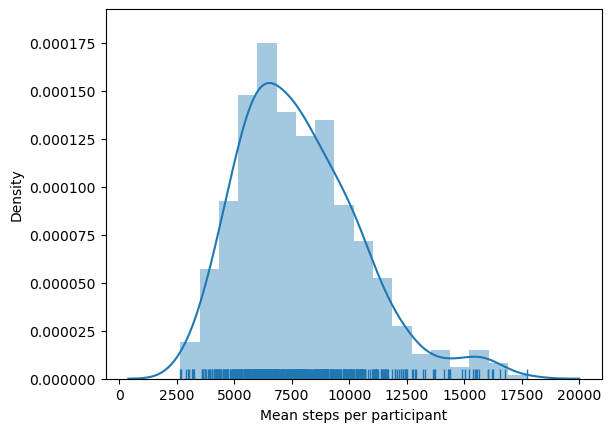

In [37]:
sns.distplot(mean_steps, rug=True)
plt.show()

/Users/godajusaite/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


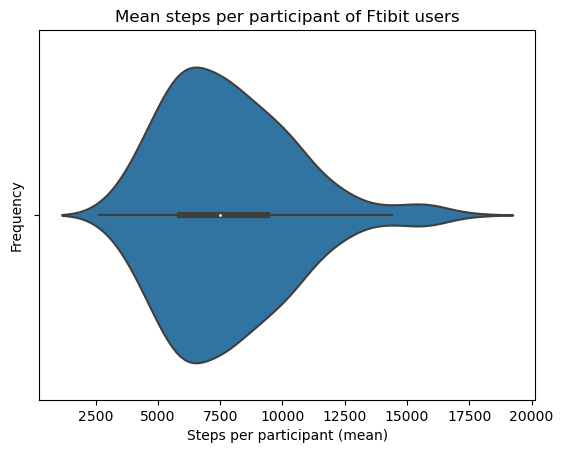

In [38]:
sns.violinplot(dfFinal['mean'])
cases = dfFinal["mean"]
plt.title('Mean steps per participant of Ftibit users')
plt.ylabel('Frequency')
plt.xlabel('Steps per participant (mean)')
plt.show()

Bell curve is apparent, it is right skewed. The distribution is asymetrical. That means that majority of data points are not always similar. That might be due to a lot of missing values and me not excluding enough participants of the dataset.
The box plot showed us that outliers are the most apparent when the mean steps per participant is between 14000 and 17000 steps.

### The relation of mean steps per participant with two categorical variables 

#### Graph of the relation

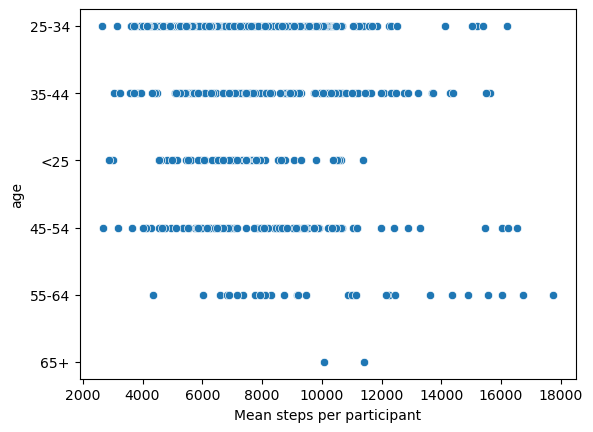

In [39]:
sns.scatterplot(data = dfFinal, x=dfFinal["mean"], y=dfFinal["age"])
plt.show()


Graph above displays that for people aged 25-34 mean steps per participant is the most common when the value is 2000-12000 steps. People aged 35-44 have a higher value mean steps per participant than younger people. This means they on average do more steps than the younger users. For users aged 45-54 years old the distribution of steps is similar to people aged 25-34 years old. For people aged 55-64 years old steps distribution varies the most. People aged more than 65 years old walk the least steps.

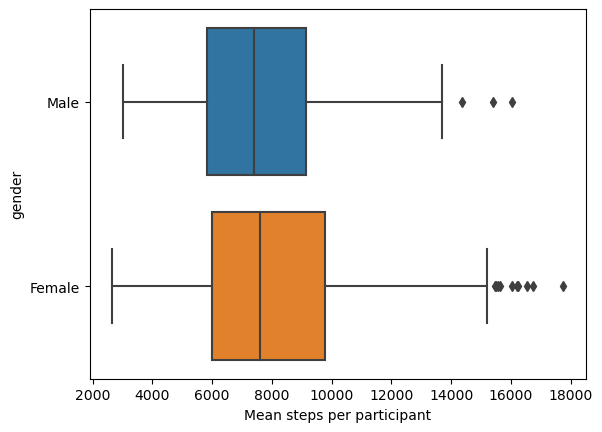

In [40]:
sns.boxplot(data= dfFinal, x=dfFinal["mean"], y=dfFinal["gender"])
plt.show()


A plot displayed above shows that on average females walk more steps compared to males. Females also have more extreme values- more females walk extremely high amount of steps (mean is higher than 15000) compared to males.

Plots above show that females walk on average more steps than males (mean of steps is higher). Males mostly walk similar amount of steps compared to females (variety is not very big). Results of females' steps vary more. The biggest part of females walk on average quite similar amount of steps but a part of females walk extremely high amount of steps.

# Weekly assignment 2: correlation

In this week's assignment I will be exploring the numerical variables that are apparent in the dataset. 

### Exploratory data analysis

#### Scatterplot matrix
A scatterplot matrix will give an insight on what are the relationships between several values. 

In [41]:
dfFinal.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,21-6-2013,...,6-1-2014,7-1-2014,8-1-2014,9-1-2014,10-1-2014,11-1-2014,13-1-2014,14-1-2014,15-1-2014,mean
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,15015.0,5926.0,14658.0,7314.0,4949.0,9945.0,9209.0,11579.0,16001.0,10148.607362
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,11428.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8598.884892
5,6,Lille,Male,35-44,1,1,Vocational,170.0,63.0,16924.0,...,6199.0,6227.0,3821.0,6891.0,7407.0,9474.0,11674.0,8509.0,6244.0,12064.380282
7,8,Bordeaux,Female,25-34,3,4,Master or doctorate,165.0,88.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3614.421053


Creating a separate dataset which contains only values of which relations I will be looking at

In [42]:
df_subset= dfFinal[['height', 'weight', 'mean']]
df_subset.head()

,height,weight,mean
0,178.0,98.0,10148.607362
1,180.0,77.0,5687.423313
2,180.0,83.0,8598.884892
5,170.0,63.0,12064.380282
7,165.0,88.0,3614.421053


Sorting values of height & weight to make sure that no extreme / impossible values are included to a dataset

In [43]:
df_sorted= df_subset.sort_values('weight')

In [44]:
df_sorted.sort_values('height')

,height,weight,mean
303,145.0,51.0,15031.909091
67,150.0,45.0,15631.566038
907,150.0,72.0,16239.755319
875,151.0,50.0,8933.840708
685,153.0,70.0,3159.562500
...,...,...,...
545,190.0,84.0,8912.200000
264,192.0,90.0,7354.954887
577,192.0,81.0,7042.685950
212,195.0,79.0,11186.225806


Scatterplot matrix of numerical values

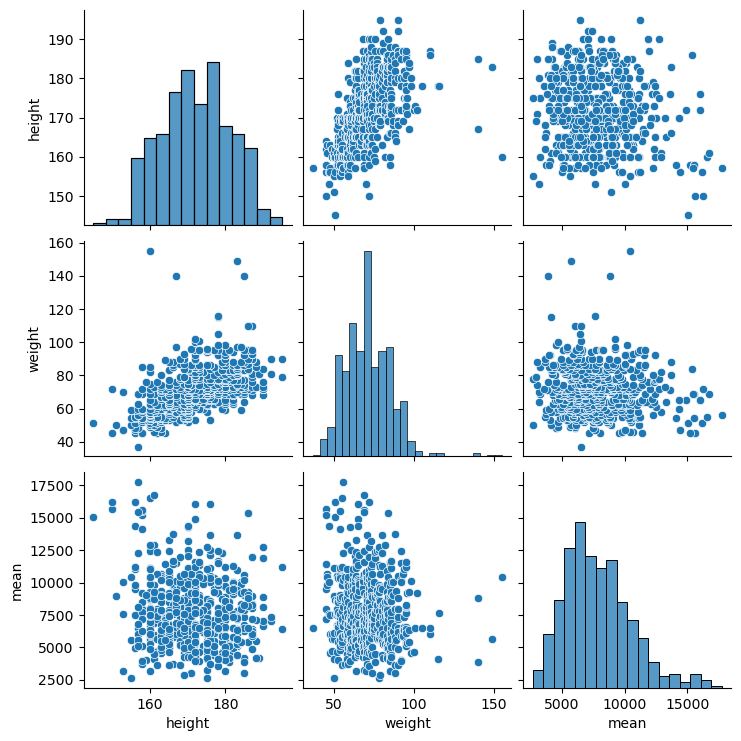

In [45]:
sns.pairplot(df_sorted)
plt.show() #using Matplotlib to show the plot

From the plots it's not possible to see if mean steps per participant and height/weight are correlated. There is a connection between user's weight and height (the taller a user is the more he weighs).

#### Correlation matrix

With a use of correlation matrix I am calculating correlations between numerical variables

In [46]:
corr = df_sorted[['height', 'weight', 'mean']].corr() 
corr

,height,weight,mean
height,1.000000,0.539623,-0.158680
weight,0.539623,1.000000,-0.120769
mean,-0.158680,-0.120769,1.000000


In [47]:
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
print(pearsonr(df_sorted['mean'],df_sorted['height']))
print(pearsonr(df_sorted['mean'],df_sorted['weight']))

PearsonRResult(statistic=-0.1586800932727641, pvalue=0.00015015244811298592)
PearsonRResult(statistic=-0.12076901726379863, pvalue=0.004010019476704894)


/var/folders/j6/p7qg0rss7hs27mn4tymt60xr0000gp/T/ipykernel_98634/1036372111.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy


The output gives us two numbers: pearsonr which is -0.16, and _p_ which is 0.00015 We can conclude the following:

* The correlation between mean steps per participant and participants' weight & height is low ( mean and height/ weight aren't correlated (_r_ = -0.16))
* The correlation between mean and height is significant (_p_ < 0.001) but correlation between mean and weight is insignificant (_p_>0.001)

# Weekly assignment 3: linear regression

## Predictive model 

#### Linear regression 
Linear regresssion is a model which shows the relationship between an independent variable and a dependent variable using a straight line. It is a method of prediction and data explanation.

#### Creating dummy variables for categorical variables

In [48]:
dfFinal.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,21-6-2013,...,6-1-2014,7-1-2014,8-1-2014,9-1-2014,10-1-2014,11-1-2014,13-1-2014,14-1-2014,15-1-2014,mean
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,15015.0,5926.0,14658.0,7314.0,4949.0,9945.0,9209.0,11579.0,16001.0,10148.607362
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,11428.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8598.884892
5,6,Lille,Male,35-44,1,1,Vocational,170.0,63.0,16924.0,...,6199.0,6227.0,3821.0,6891.0,7407.0,9474.0,11674.0,8509.0,6244.0,12064.380282
7,8,Bordeaux,Female,25-34,3,4,Master or doctorate,165.0,88.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3614.421053


With a help of dummy variables I can convert categorical variables to numerical variables so in this way categorical variables can be used in further data analysis and calculations

In [49]:
#getting dummy data for categorical variables
dfFinal = pd.get_dummies(dfFinal, columns=['gender', 'city', 'education_1'])
dfFinal.head()

,id,age,hh_size,education,height,weight,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,city_Bordeaux,city_Lille,city_Lyon,city_Montpellier,education_1_Bachelor,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational
0,1,25-34,4,4,178.0,98.0,0.0,0.0,0.0,3941.0,...,1,0,0,0,0,0,1,0,0,0
1,2,35-44,1,3,180.0,77.0,0.0,10473.0,705.0,4287.0,...,0,1,0,0,1,0,0,0,0,0
2,3,25-34,2,2,180.0,83.0,11428.0,12523.0,2553.0,190.0,...,0,0,0,1,0,0,1,0,0,0
5,6,35-44,1,1,170.0,63.0,16924.0,14411.0,5121.0,29784.0,...,0,1,0,0,0,0,0,0,0,1
7,8,25-34,3,4,165.0,88.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0


I will be using linear regression model to predict the mean steps per participant. For that I will need to split the dataset into training and test data. But before that I will try to find out which variables are correlated the most so then I would use these variables to fit linear regression model to predict the mean steps per participant.

In [50]:
#dropping duplicates from a dataframe to make sure there are no duplicated columns in case the dummies were created twice
#dfDum = onlyDummies.T.drop_duplicates().T
#dfDum.head()

1. Importing libraries

In [51]:
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

2. Correlation matrix is used to see the relationships between numerical variables, and determine which of them are correlated to variable mean the most. Including only numerical values to calculate correlations and excluding variables related to steps per participant

In [55]:
corr = dfFinal[['height', 'weight', 'mean', 'id', 'age','gender_Male', 'gender_Female', 'city_Lille', 'city_Lyon', 'city_Montpellier', 'education_1_High school', 'education_1_Master or doctorate', 'education_1_No degree', 'education_1_Primary', 'education_1_Vocational']].corr() 
corr

,height,weight,mean,id,gender_Male,gender_Female,city_Lille,city_Lyon,city_Montpellier,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational
height,1.000000,0.539623,-0.158680,0.012385,0.718189,-0.718189,-0.075060,0.034735,0.103377,-0.178128,0.215385,0.061361,-0.112978,-0.044097
weight,0.539623,1.000000,-0.120769,0.026143,0.435073,-0.435073,-0.071922,0.004748,0.048348,0.024096,0.076509,0.000985,-0.099443,-0.011943
mean,-0.158680,-0.120769,1.000000,0.018506,-0.084178,0.084178,0.164008,-0.020578,-0.154654,0.093254,-0.108946,-0.007367,0.082420,-0.029037
id,0.012385,0.026143,0.018506,1.000000,0.040111,-0.040111,-0.020835,-0.007838,0.061693,0.027682,-0.003098,-0.061998,-0.021136,-0.063605
gender_Male,0.718189,0.435073,-0.084178,0.040111,1.000000,-1.000000,-0.099482,0.039111,0.121388,-0.173246,0.204758,0.039615,-0.086810,-0.030691
gender_Female,-0.718189,-0.435073,0.084178,-0.040111,-1.000000,1.000000,0.099482,-0.039111,-0.121388,0.173246,-0.204758,-0.039615,0.086810,0.030691
city_Lille,-0.075060,-0.071922,0.164008,-0.020835,-0.099482,0.099482,1.000000,-0.470929,-0.496740,0.089761,-0.087330,-0.047130,0.003354,0.016744
city_Lyon,0.034735,0.004748,-0.020578,-0.007838,0.039111,-0.039111,-0.470929,1.000000,-0.186401,-0.022976,0.103495,0.100078,0.042456,-0.053669
city_Montpellier,0.103377,0.048348,-0.154654,0.061693,0.121388,-0.121388,-0.496740,-0.186401,1.000000,-0.096288,0.063347,-0.018655,-0.049620,-0.007391
education_1_High school,-0.178128,0.024096,0.093254,0.027682,-0.173246,0.173246,0.089761,-0.022976,-0.096288,1.000000,-0.338004,-0.014889,-0.039603,-0.067734


Variables: city_Lille, gender_Female, education_1_High school and education_1_Primary have the strongest correlation to the variable mean. Therefore I will use these variables to train linear regression model.

3.Selecting which variables will be used to train the data

In [56]:
y = dfFinal['mean'] #We need to take out the rating as our Y-variable
X = dfFinal[["city_Lille", "gender_Female", "education_1_High school", "education_1_Primary"]]
X.index = dfFinal['id'] #this stores the movie names in the column names, so we don't lose track of them later
X.head()


,city_Lille,gender_Female,education_1_High school,education_1_Primary
id,,,,
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
6,1,0,0,0
8,0,1,0,0


4. Splitting the data into training set and a test set

In [57]:
# Built-in function from sk-learn splits the data set randomly into a train set and a test set
# I split the data into 70% training data and 30% test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

,city_Lille,gender_Female,education_1_High school,education_1_Primary
id,,,,
775,1,0,0,0
859,0,0,0,0
681,0,0,0,0
309,0,0,0,0
402,1,0,0,0


5. Creating a linear regression model and training it

In [58]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

6. Calculating coeficients of the model

In [59]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
616.741409,city_Lille
245.048753,gender_Female
453.213274,education_1_High school
-417.258014,education_1_Primary


7. Generating predictions for the test data, so I'm using X.test, not X.train

In [60]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.04530900926674064

#### Predictive power of the model (R2, RMSE)

The R^2 is 0.045, which means 0.05% of the variation in mean number steps per participant can be explained by the model. Let's calculate the RMSE: the root mean squared error.

Now I will calculate the RMSE: the root mean squared error. It means taking the mean number of all residuals

In [61]:
math.sqrt(mean_squared_error(y_test, y_test_p))

2668.1793513522266

The RMSE is 2668. Which means that we are typically about 2668 steps off in our predicted mean number. Finally, let's plot the predicted value against the actual mean value.

### Evaluation of the results

Mean number of steps per participant increases in 616 steps for participants living in city Lille. Mean number steps per participant increases 245 steps if the participant is a female. Mean number steps per participant increases 453 steps if a participant have a High School degree.

In [62]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.04530900926674064

The R^2 is 0.045, which means 0.05% of the variation in mean number steps per participant is explained by the model. Let's calculate the RMSE: the root mean squared error.

In [63]:
math.sqrt(mean_squared_error(y_test, y_test_p))

2668.1793513522266

The RMSE is 2668. Which means that we are typically about 2668 steps off in our predicted mean number. Finally, let's plot the predicted value against the actual mean value.

/Users/godajusaite/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


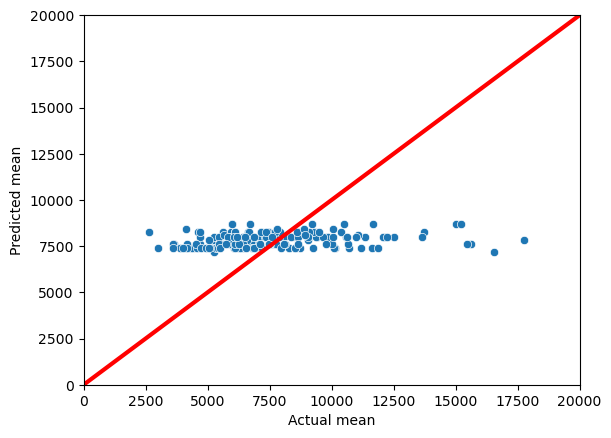

In [64]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual mean')
plt.ylabel('Predicted mean')
plt.xlim([0,20000]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([0,20000])
plt.plot([0, 2.5e10], [0, 2.5e10], color='red', lw=3) #Plot a diagonal length
plt.show()

The predictions are of an average quality. The best predictions lay around the value of 7000. Predicted steps mean number is either too high (above the red line), either too low. Residuals are mostly apparent when the actual mean number of steps per participant is extremely high (might be due to the outliers which I didn't remove). The bigger amount of actual steps, the worst the predictions are.

## Conclusion

The assignment of Fitbit step data analysis began with me opening csv file, containing the neccessary data. After that I cleaned the data- removed impossible and NaN values. 
After that I calculated mean and median numbers for steps per participant and added such columns to a dataframe. Then I made a few plots to see the distributons of variable mean number of steps and some categorical values. 
Then I made correlatioin plots to see the relationships between numerical values and a value mean number of steps. I converted categorical values to numerical values with a use of get_dummies method. Then I drew a correlation matrix to identify which variables have the strongest correlation to the variable mean. 
Then I started building a creative model. For that I selected which variables will be used to train the data. I split the data into a test and training data.Then I created a kinear regression model and trained it, using the training dataset. After I calculated coeficients of the model. Then I generated predictions for the test data. Finally I was able to draw a plot representing correlation betwen actual mean value and a predicted mean value.The predictions were not very correct (0.05% of predictions can be explained by the model I created) and the residuals were the most present while mean value was increasing. The most extreme e (residual) value was 1000 steps.
Predicted values were related to actual values but the prediction could have been improved if I cleaned the data more carefully and removed the outliers.